### 描述性统计分析可视化

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
%matplotlib inline

In [60]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 10

In [61]:
plt.rcParams['font.sans-serif']='SimHei' #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False #解决负号无法显示的问题
%config InlineBackend.figure_format = 'svg' #将图表设置为svg格式以保证更为清晰的显示

### 月度与月度累计同比环比增长

In [62]:
def func(df, column='月度销售'):
    return df[column].cumsum()

In [63]:
f = lambda x:x.format(x*100,'0.2f')

In [64]:
# 加载原始数据
df0 = pd.read_excel(r'C:\Users\Nikola\Desktop\Python\销售记录.xlsx',
                    encoding='utf8',
                    index_col='下单日期')

In [65]:
# 基础数据获取
df1 = df0[['订单编号', '客户ID','客户省份', '销售代表ID','产品ID', '产品名称', '数量', '单价', '金额']].sort_index()

In [66]:
df1['金额'] = df1['金额']/10000

In [67]:
df2 = df1.groupby(df1.index.to_period('M'))[['金额']].sum()
df2.rename(columns={'金额':'月度销售'},inplace=True)
df2['上月销售'] = df2.shift(1)['月度销售']
df2['去年同月'] = df2.shift(12)['月度销售']
df2['MOM环比'] = (df2['月度销售']/df2['上月销售']-1)
df2['YOY同比'] = df2['月度销售']/df2['去年同月']-1

In [68]:
df3 = pd.DataFrame(df2.groupby(df2.index.year).apply(func))
df3.reset_index(level=0,inplace=True)
df3.drop('下单日期',axis=1,inplace=True)
df3.columns=['年度累计']
df3['去年累计'] = df3.shift(12)['年度累计']

In [69]:
DF = df2.join(df3)
DF['累计同比'] = DF['年度累计']/DF['去年累计']-1
DF.reindex(columns=['月度销售', '上月销售', '去年同月', '去年累计','年度累计', 'MOM环比', 'YOY同比',  '累计同比'])

,月度销售,上月销售,去年同月,去年累计,年度累计,MOM环比,YOY同比,累计同比
下单日期,,,,,,,,
2017-01,397.063643,NaN,NaN,NaN,397.063643,NaN,NaN,NaN
2017-02,147.553836,397.063643,NaN,NaN,544.617479,-0.628387,NaN,NaN
2017-03,297.635327,147.553836,NaN,NaN,842.252806,1.017130,NaN,NaN
2017-04,177.004740,297.635327,NaN,NaN,1019.257545,-0.405297,NaN,NaN
2017-05,309.248187,177.004740,NaN,NaN,1328.505733,0.747118,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-08,334.506757,500.141280,217.766675,2300.406574,2718.723652,-0.331175,0.536079,0.181845
2018-09,454.021220,334.506757,345.534238,2645.940812,3172.744872,0.357286,0.313969,0.199099
2018-10,480.186203,454.021220,254.709201,2900.650013,3652.931075,0.057629,0.885233,0.259349


In [70]:
# DF.to_excel(r'C:\Users\Nikola\Desktop\1-1 同比环比.xlsx')

### 年度同比增长

In [71]:
# 数据透视行月份，列年份，值销售金额
df1.index = df1.index.to_period('D')
df1

,订单编号,客户ID,客户省份,销售代表ID,产品ID,产品名称,数量,单价,金额
下单日期,,,,,,,,,
2017-01-01,SO45308,29861,安徽,201,743,山地自行车,5,2039.9940,1.019997
2017-01-01,SO45304,29664,湖南,210,743,山地自行车,2,2039.9940,0.407999
2017-01-01,SO45304,29664,湖南,210,743,山地自行车,1,2039.9940,0.203999
2017-01-01,SO45304,29664,湖南,210,743,山地自行车,2,2039.9940,0.407999
2017-01-01,SO45272,29539,北京,205,709,公路自行车,3,419.4589,0.125838
...,...,...,...,...,...,...,...,...,...
2018-12-31,SO63344,11413,陕西,213,729,旅游自行车外胎,1,28.9900,0.002899
2018-12-31,SO63344,11413,陕西,213,724,旅游自行车,1,742.3500,0.074235
2018-12-31,SO63219,29947,江苏,201,758,运动头盔,6,20.9940,0.012596


In [72]:
df4 = df1.pivot_table(values='金额',index=df1.index.month, columns=df1.index.year,aggfunc='sum')
df4

下单日期,2017,2018
下单日期,,
1,397.063643,208.821842
2,147.553836,232.008428
3,297.635327,341.396376
4,177.004740,253.465075
5,309.248187,330.915627
...,...,...
8,217.766675,334.506757
9,345.534238,454.021220
10,254.709201,480.186203


In [73]:
df4.columns.name = '年份'
df4.index.name ='月份'
df4['同比增长'] = df4.iloc[:,1]/df4.iloc[:,0]-1
df4

年份,2017,2018,同比增长
月份,,,
1,397.063643,208.821842,-0.474085
2,147.553836,232.008428,0.572365
3,297.635327,341.396376,0.147029
4,177.004740,253.465075,0.431968
5,309.248187,330.915627,0.070065
...,...,...,...
8,217.766675,334.506757,0.536079
9,345.534238,454.021220,0.313969
10,254.709201,480.186203,0.885233


In [74]:
# df4.to_excel(r'C:\Users\Nikola\Desktop\1-2 同比环比.xlsx')

### 季度同比环比增长

In [75]:
# 季度同比环比
df5 = df1.resample('Q')[['金额']].sum()
df5['上季销售'] = df5.shift(1)['金额']
df5['同季销售'] = df5.shift(4)['金额']
df5.columns = ['季度销售','上季销售','同季销售']
df5['同比YOY'] = df5.季度销售/df5.同季销售-1
df5['环比MoM'] = df5.季度销售/df5.上季销售-1
df5

,季度销售,上季销售,同季销售,同比YOY,环比MoM
下单日期,,,,,
2017Q1,842.252806,NaN,NaN,NaN,NaN
2017Q2,897.661852,842.252806,NaN,NaN,0.065787
2017Q3,906.026154,897.661852,NaN,NaN,0.009318
2017Q4,725.148882,906.026154,NaN,NaN,-0.199638
2018Q1,782.226646,725.148882,842.252806,-0.071269,0.078712
2018Q2,1101.848970,782.226646,897.661852,0.227466,0.408606
2018Q3,1288.669256,1101.848970,906.026154,0.422331,0.169552
2018Q4,1219.141844,1288.669256,725.148882,0.681230,-0.053953


In [76]:
df5.环比MoM = df5['环比MoM'].apply(lambda x: '%.2f%%' % (x*100))
df5.同比YOY = df5['同比YOY'].apply(lambda x: '%.2f%%' % (x*100))
# df5.to_excel(r'C:\Users\Nikola\Desktop\1-3 同比环比.xlsx')

### 创建2017-2018时间维度表

In [77]:
# 创建时间序列表
ts = pd.date_range('20170101','20181231',freq='D')
df6 = pd.DataFrame(np.random.rand(len(ts)),index=ts,columns=['date'])
df6['年'] = df6.index.year
df6['季'] = df6.index.quarter
df6['月'] = df6.index.month
df6['周'] = df6.index.weekofyear
df6['星期'] = df6.index.weekday+1
df6['类别'] = np.where(df6.index.weekday<5,'工作日','周末')
df6['是否周末'] = np.where(df6.index.weekday<5,1,0)

df6['年份'] = df6['年'].apply(lambda x:str(x)+'年')
df6['季度'] = df6['季'].apply(lambda x:str(x)+'季度')
df6['月份'] = df6['月'].apply(lambda x:str(x)+'月')
df6['周序'] = df6['周'].apply(lambda x:str(x)+'周')
df6['星期几'] = df6.index.weekday_name

df6.iloc[0,[4,10]]=[1,'1周']
df6.iloc[729,10]=['52周']
df6
# df6.to_excel(r'C:\Users\Nikola\Desktop\2-0 时间维度.xlsx')

,date,年,季,月,周,星期,类别,是否周末,年份,季度,月份,周序,星期几
2017-01-01,0.318929,2017,1,1,1,7,周末,0,2017年,1季度,1周,52周,Sunday
2017-01-02,0.186374,2017,1,1,1,1,工作日,1,2017年,1季度,1月,1周,Monday
2017-01-03,0.147963,2017,1,1,1,2,工作日,1,2017年,1季度,1月,1周,Tuesday
2017-01-04,0.424326,2017,1,1,1,3,工作日,1,2017年,1季度,1月,1周,Wednesday
2017-01-05,0.674164,2017,1,1,1,4,工作日,1,2017年,1季度,1月,1周,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,0.591003,2018,4,12,52,4,工作日,1,2018年,4季度,12月,52周,Thursday
2018-12-28,0.416961,2018,4,12,52,5,工作日,1,2018年,4季度,12月,52周,Friday
2018-12-29,0.270659,2018,4,12,52,6,周末,0,2018年,4季度,12月,52周,Saturday
2018-12-30,0.251921,2018,4,12,52,7,周末,0,2018年,4季度,12月,52周,Sunday


In [78]:
# # 创建时间序列表
# ts = pd.date_range('20170101','20181231',freq='D')
# df6 = pd.DataFrame(ts,columns=['date'])
# df6['年'] = df6.date.dt.year
# df6['季'] = df6.date.dt.quarter
# df6['月'] = df6.date.dt.month
# df6['周'] = df6.date.dt.weekofyear
# df6['星期'] = df6.date.dt.weekday+1
# df6['类别'] = np.where(df6.date.dt.weekday<5,'工作日','周末')

# df6['年份'] = df6['年'].apply(lambda x:str(x)+'年')
# df6['季度'] = df6['季'].apply(lambda x:str(x)+'季度')
# df6['月份'] = df6['月'].apply(lambda x:str(x)+'月')
# df6['周序'] = df6['周'].apply(lambda x:str(x)+'周')
# df6['星期几'] = df6.date.dt.weekday_name
# df6.set_index('date',inplace=True)
# df6

### 月度工作日与节假日销售

In [79]:
df1.index

PeriodIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
             '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
             '2017-01-01', '2017-01-01',
             ...
             '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
             '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
             '2018-12-31', '2018-12-31'],
            dtype='period[D]', name='下单日期', length=78259, freq='D')

In [80]:
df6.index = df6.index.to_period('D')

In [81]:
df7 = pd.merge(df1,df6,left_index=True,right_index=True,how='left')
df8 = df7.resample('M')[['金额']].sum() # 每个月的销售金额
df8.columns = ['月度销售']
df9 = df7[df7['类别']=='工作日'][['金额']].resample('M').sum() # 每个月工作日的销售金额
df9.columns = ['工作日销售']
df10 = df7[df7['类别']=='周末'][['金额']].resample('M').sum() # 每个月节假日的销售金额
df10.columns = ['节假日销售']


df11 = df6.resample('M')[['类别']].count() # 每个月的天数
df11.columns = ['当月天数']
df12 = df6[df6['类别']=='工作日'][['类别']].resample('M').count() # 工作日天数
df12.columns = ['工作日数']
df13 = df6[df6['类别']=='周末'][['类别']].resample('M').count() # 节假日天数
df13.columns = ['节假日数']
DF2 = df8.join([df9,df10,df11,df12,df13])
DF2['日均销售'] = DF2['月度销售']/DF2['当月天数']
DF2['工作日均销售'] = DF2['工作日销售']/DF2['工作日数']
DF2['节假日均销售'] = DF2['节假日销售']/DF2['节假日数']
DF2['节假日销售占比'] = DF2['节假日销售']/DF2['月度销售']
DF2['工作日销售占比'] = 1- DF2['节假日销售占比']


DF2


,月度销售,工作日销售,节假日销售,当月天数,工作日数,节假日数,日均销售,工作日均销售,节假日均销售,节假日销售占比,工作日销售占比
下单日期,,,,,,,,,,,
2017-01,397.063643,44.137754,352.925889,31,22,9,12.808505,2.006262,39.213988,0.888840,0.111160
2017-02,147.553836,130.690264,16.863572,28,20,8,5.269780,6.534513,2.107947,0.114288,0.885712
2017-03,297.635327,280.238452,17.396875,31,23,8,9.601140,12.184281,2.174609,0.058450,0.941550
2017-04,177.004740,42.627034,134.377706,30,20,10,5.900158,2.131352,13.437771,0.759176,0.240824
2017-05,309.248187,291.934050,17.314137,31,23,8,9.975748,12.692785,2.164267,0.055988,0.944012
...,...,...,...,...,...,...,...,...,...,...,...
2018-08,334.506757,300.669093,33.837664,31,23,8,10.790541,13.072569,4.229708,0.101157,0.898843
2018-09,454.021220,72.187759,381.833461,30,20,10,15.134041,3.609388,38.183346,0.841004,0.158996
2018-10,480.186203,446.068918,34.117285,31,23,8,15.489878,19.394301,4.264661,0.071050,0.928950


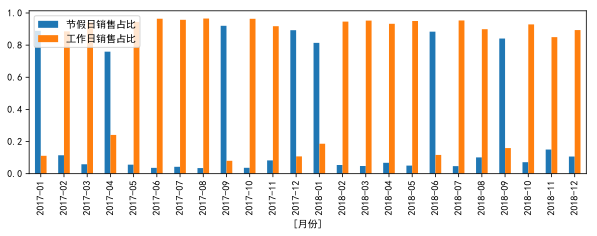

In [82]:
DF2.index.name=['月份']
DF2[['节假日销售占比','工作日销售占比']].plot(kind='bar',figsize=(10,3))
# DF2.to_excel(r'C:\Users\Nikola\Desktop\2-1 工作日与节假日销售.xlsx')

### 客户RFM分析

In [233]:
# 创建RFM参数表
d_rfm = pd.DataFrame({'R':['近','远','近','远','近','远','近','远'],
                     'F':['高','高','低','低','高','高','低','低'],
                     'M':['高','高','高','高','低','低','低','低'],
                     '客户类型':['重要价值客户','重要保持客户','重要发展客户','重要挽留客户','一般价值客户','一般保持客户','一般发展客户','一般挽留客户'],
                     'RFM类型':['近高高','远高高','近低高','远低高','近高低','远高低','近低低','远低低']})
d_rfm

,R,F,M,客户类型,RFM类型
0,近,高,高,重要价值客户,近高高
1,远,高,高,重要保持客户,远高高
2,近,低,高,重要发展客户,近低高
3,远,低,高,重要挽留客户,远低高
4,近,高,低,一般价值客户,近高低
5,远,高,低,一般保持客户,远高低
6,近,低,低,一般发展客户,近低低
7,远,低,低,一般挽留客户,远低低


In [234]:
df1.index.name='日期'
df1.reset_index(inplace=True)
df1

ValueError: cannot insert 日期, already exists

In [235]:
# 定义要给函数，去除订单编号列的不重复计数
def qc(df,column='订单编号'):
    c = df[column].drop_duplicates().count()
    return c

In [ ]:
# 第二次运行出错，后续尝试将今天的日期转化为元年天数，减去下单日期对应的元年天数，求出近度天数
df1['jd_delta']=datetime.date(datetime.today())-pd.date_range(df1['日期'])
df1['jd_delta']

In [ ]:
d_jd = df1.groupby('客户ID')['jd_delta'].min() # 客户每笔订单的进度，然后取最小值
d_pd = df1.groupby('客户ID').apply(qc) # 客户订单的不重复计数
d_sum = df1.groupby('客户ID')['金额'].sum() # 客户累计销售金额
d_sy = d_sum/d_pd # 客户平均订单大小

In [ ]:
DF3 = pd.concat([d_jd,d_pd,d_sy,d_sum],axis=1)
DF3.columns = ['J','P','S','Sum']
DF3['R'] = np.where(DF3['J']>DF3['J'].mean(),'远','近')
DF3['F'] = np.where(DF3['P']>DF3['P'].mean(),'高','低')
DF3['M'] = np.where(DF3['S']>DF3['S'].mean(),'高','低')
DF3['RFM'] = DF3['R']+DF3['F']+DF3['M']
DF3.reset_index(inplace=True) #因为merge合并会重置索引，所以需要保留客户ID

DF3 = pd.merge(DF3,d_rfm[['客户类型','RFM类型']],how='left',left_on='RFM',right_on='RFM类型').drop('RFM类型',axis=1)

DF3

In [ ]:
DF4 = DF3.groupby('客户类型').agg({'Sum':'sum','客户ID':'count','P':'sum'})
DF4.columns = ['销售金额','客户数量','订单数量']

DF4['销售占比'] = DF4['销售金额']/DF4['销售金额'].sum()
DF4['客户占比'] = DF4['客户数量']/DF4['客户数量'].sum()
DF4['订单占比'] = DF4['订单数量']/DF4['订单数量'].sum()

DF4.to_excel(r'C:\Users\Nikola\Desktop\3-1 RFM分析.xlsx')

DF4

In [ ]:
DF4[['销售占比','客户占比','订单占比']].plot(kind='bar',figsize=(10,4))

### 客户ABC分析

In [ ]:
abc_ana = DF3.sort_values(by=['Sum'],ascending=False).reset_index()[['客户ID','P','Sum']]
abc_ana.columns = ['客户ID','P','销售金额']
abc_ana['累计占比']=(abc_ana['销售金额']/abc_ana['销售金额'].sum()).cumsum()
abc_ana['ABC类别'] = np.where(abc_ana['累计占比']<=0.7,'A',np.where(abc_ana['累计占比']<=0.9,'B','C'))
abc_ana = abc_ana.groupby('ABC类别').agg({'客户ID':'count','P':'sum','销售金额':'sum'})
abc_ana.columns =['客户数量','订单数量','销售金额']

abc_ana['客户占比'] = abc_ana['客户数量']/abc_ana['客户数量'].sum()
abc_ana['订单占比'] = abc_ana['订单数量']/abc_ana['订单数量'].sum()
abc_ana['销售占比'] = abc_ana['销售金额']/abc_ana['销售金额'].sum()

abc_ana

In [ ]:
abc_ana['销售占比'].plot(kind='pie')

### 新老客户

In [106]:
df1

,日期,订单编号,客户ID,客户省份,销售代表ID,产品ID,产品名称,数量,单价,金额
0,2017-01-01,SO45308,29861,安徽,201,743,山地自行车,5,2039.9940,1.019997
1,2017-01-01,SO45304,29664,湖南,210,743,山地自行车,2,2039.9940,0.407999
2,2017-01-01,SO45304,29664,湖南,210,743,山地自行车,1,2039.9940,0.203999
3,2017-01-01,SO45304,29664,湖南,210,743,山地自行车,2,2039.9940,0.407999
4,2017-01-01,SO45272,29539,北京,205,709,公路自行车,3,419.4589,0.125838
...,...,...,...,...,...,...,...,...,...,...
78254,2018-12-31,SO63344,11413,陕西,213,729,旅游自行车外胎,1,28.9900,0.002899
78255,2018-12-31,SO63344,11413,陕西,213,724,旅游自行车,1,742.3500,0.074235
78256,2018-12-31,SO63219,29947,江苏,201,758,运动头盔,6,20.9940,0.012596
78257,2018-12-31,SO63302,16824,宁夏,213,731,帽子,1,8.9900,0.000899


In [114]:
fa_data = df1.sort_values(['日期'],ascending = True).reset_index(drop=True)
fa_data

,日期,订单编号,客户ID,客户省份,销售代表ID,产品ID,产品名称,数量,单价,金额
0,2017-01-01,SO45308,29861,安徽,201,743,山地自行车,5,2039.9940,1.019997
1,2017-01-01,SO45291,30117,贵州,214,709,公路自行车,3,419.4589,0.125838
2,2017-01-01,SO45341,29774,湖南,210,743,山地自行车,2,2039.9940,0.407999
3,2017-01-01,SO45291,30117,贵州,214,709,公路自行车,3,419.4589,0.125838
4,2017-01-01,SO45273,29717,四川,214,743,山地自行车,2,2039.9940,0.407999
...,...,...,...,...,...,...,...,...,...,...
78254,2018-12-31,SO63236,30021,安徽,201,743,山地自行车,2,1376.9940,0.275399
78255,2018-12-31,SO63236,30021,安徽,201,736,女士山地短裤,2,41.9940,0.008399
78256,2018-12-31,SO63180,29716,吉林,207,706,短袖经典运动衫,5,32.3940,0.016197
78257,2018-12-31,SO63279,29543,浙江,204,709,公路自行车,2,323.9940,0.064799


In [139]:
grouped = fa_data.groupby(['客户ID'])['订单编号','金额'].agg({'订单编号':'count',"金额":'sum'})
grouped.rename(columns={'订单编号':'交易次数','金额':'交易额'},inplace=True)
grouped['客户分类'] = np.where(grouped.交易次数>1,'老客户','新客户')

XL = grouped.groupby('客户分类')['交易额'].agg([('客户数量','count'),('销售额','sum')])
XL['销售占比'] = XL['销售额']/XL['销售额'].sum()
XL['客户占比'] = XL['客户数量']/XL['客户数量'].sum()

XL



,客户数量,销售额,销售占比,客户占比
客户分类,,,,
新客户,3465,451.805348,0.0582,0.278336
老客户,8984,7311.171062,0.9418,0.721664


### 首次交易与再次交易

In [140]:
fa_data

,日期,订单编号,客户ID,客户省份,销售代表ID,产品ID,产品名称,数量,单价,金额
0,2017-01-01,SO45308,29861,安徽,201,743,山地自行车,5,2039.9940,1.019997
1,2017-01-01,SO45291,30117,贵州,214,709,公路自行车,3,419.4589,0.125838
2,2017-01-01,SO45341,29774,湖南,210,743,山地自行车,2,2039.9940,0.407999
3,2017-01-01,SO45291,30117,贵州,214,709,公路自行车,3,419.4589,0.125838
4,2017-01-01,SO45273,29717,四川,214,743,山地自行车,2,2039.9940,0.407999
...,...,...,...,...,...,...,...,...,...,...
78254,2018-12-31,SO63236,30021,安徽,201,743,山地自行车,2,1376.9940,0.275399
78255,2018-12-31,SO63236,30021,安徽,201,736,女士山地短裤,2,41.9940,0.008399
78256,2018-12-31,SO63180,29716,吉林,207,706,短袖经典运动衫,5,32.3940,0.016197
78257,2018-12-31,SO63279,29543,浙江,204,709,公路自行车,2,323.9940,0.064799


In [151]:
G1 = fa_data.groupby('客户ID')['金额']

In [158]:
def split_count(df):
    f = df.iloc[0]
    l = df.iloc[1:].sum()
    t = df.sum()
    return {'首次交易':f,'再次交易':l,'交易额':t}

In [161]:
G1.apply(split_count).unstack()

,交易额,再次交易,首次交易
客户ID,,,
11000,0.484900,0.482702,0.002198
11001,0.241993,0.241094,0.000899
11002,0.471405,0.241906,0.229499
11003,0.473930,0.244431,0.229499
11004,0.479602,0.476103,0.003499
...,...,...,...
30114,1.108382,1.043583,0.064799
30115,0.824527,0.804293,0.020233
30116,14.871027,14.837622,0.033406


### 客户销售额区间

In [225]:
# 以客户ID为键对订单和订单额进行分组
customer_s_data = fa_data.groupby('客户ID').agg({'订单编号':"count",'金额':'sum'}).rename(columns={'订单编号':'订单量','金额':'订单额'})
customer_s_data

,订单量,订单额
客户ID,,
11000,7,0.484900
11001,6,0.241993
11002,3,0.471405
11003,8,0.473930
11004,5,0.479602
...,...,...
30114,27,1.108382
30115,20,0.824527
30116,90,14.871027


In [226]:
customer_s_data['类别'] = pd.cut(customer_s_data.订单额, 10,precision=1)#,labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])

In [227]:
customer_s_data = customer_s_data.reset_index()
customer_s_data

,客户ID,订单量,订单额,类别
0,11000,7,0.484900,"(-0.07, 7.0]"
1,11001,6,0.241993,"(-0.07, 7.0]"
2,11002,3,0.471405,"(-0.07, 7.0]"
3,11003,8,0.473930,"(-0.07, 7.0]"
4,11004,5,0.479602,"(-0.07, 7.0]"
...,...,...,...,...
12444,30114,27,1.108382,"(-0.07, 7.0]"
12445,30115,20,0.824527,"(-0.07, 7.0]"
12446,30116,90,14.871027,"(14.0, 21.0]"
12447,30117,352,69.916142,"(62.9, 69.9]"


In [232]:
c_sales = customer_s_data.groupby('类别').agg({'客户ID':'count','订单量':'sum','订单额':'sum'})
c_sales.columns =['客户量','订单量','订单额']
c_sales['客户占比'] = c_sales.客户量/c_sales.客户量.sum()
c_sales['订单占比'] = c_sales.订单量/c_sales.订单量.sum()
c_sales['销售占比'] = c_sales.订单额/c_sales.订单额.sum()


c_sales

,客户量,订单量,订单额,客户占比,订单占比,销售占比
类别,,,,,,
"(-0.07, 7.0]",12222,40641,2412.814723,0.981766,0.519314,0.310811
"(7.0, 14.0]",84,6625,840.559073,0.006748,0.084655,0.108278
"(14.0, 21.0]",28,3573,470.801397,0.002249,0.045656,0.060647
"(21.0, 28.0]",46,9211,1126.611048,0.003695,0.117699,0.145126
"(28.0, 35.0]",29,7213,898.581393,0.002330,0.092168,0.115752
"(35.0, 42.0]",11,2638,418.257758,0.000884,0.033709,0.053879
"(42.0, 48.9]",6,1460,272.385913,0.000482,0.018656,0.035088
"(48.9, 55.9]",9,2711,468.567568,0.000723,0.034641,0.060359
"(55.9, 62.9]",11,3335,650.474633,0.000884,0.042615,0.083792
